In [18]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram

In [19]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2, ref=np.max)
#         D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 3: Log power spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()

In [20]:
DATASET = "/Users/mbare/repos/audana/dataset/Audio/"
sound_file_paths = [DATASET+"Deceptive/trial_lie_0.wav"]
sound_names = ["deceptive"]

# sound_file_paths = ["57320-0-0-7.wav","24074-1-0-3.wav","15564-2-0-1.wav","31323-3-0-1.wav",
# "46669-4-0-35.wav","89948-5-0-0.wav","40722-8-0-4.wav",
# "103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav"]

# sound_names = ["air conditioner","car horn","children playing",
# "dog bark","drilling","engine idling", "gun shot",
# "jackhammer","siren","street music"]

raw_sounds = load_sound_files(sound_file_paths)
# plot_waves(sound_names,raw_sounds)
# plot_specgram(sound_names,raw_sounds)
# plot_log_power_specgram(sound_names,raw_sounds)

# Feature Extraction

In [21]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, 
                                         sub_dir, 
                                         file_ext)):
            try:
                print ("FEX : ",fn)
                mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: %s", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            # labels = np.append(labels, fn.split('/')[6].split('-')[1])
            labels = np.append(labels, [1 if sub_dir=="Deceptive" else 0])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels.astype(int)] = 1
    return one_hot_encode

In [94]:
parent_dir = DATASET
tr_sub_dirs = ["Truthful","Deceptive"]
ts_sub_dirs = ["test"]

tr_features, tr_labels = parse_audio_files(parent_dir,tr_sub_dirs)
ts_features, ts_labels = parse_audio_files(parent_dir,ts_sub_dirs)
 
# tr_labels = one_hot_encode(tr_labels)
# ts_labels = one_hot_encode(ts_labels)

FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_001.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_015.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_029.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_0.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_028.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_016.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_002.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_003.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_017.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_013.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_007.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_006.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Truthful/trial_truth_012.wav
FEX :  /Users/

FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_009.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_035.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_021.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_019.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_025.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_031.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_030.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_018.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_032.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_026.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_027.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/Deceptive/trial_lie_033.wav
FEX :  /Users/mbare/repos/audana/dataset/Audio/test/trial_lie_016.wav
FEX :  /Users/mbare/repos/auda

In [188]:
import pandas as pd
df_feat = pd.DataFrame(data=tr_features)
df_lab = pd.DataFrame(data=tr_labels,columns=['target'])
df_tot = pd.concat([df_feat, df_lab['target']], axis=1)


In [206]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df_feat.values
y = df_lab.values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = principal_components
             , columns = ['pc 1', 'pc 2', 'pc 3'])
pca_df = pd.concat([pca_df, df_lab['target']], axis = 1)
pca_df.head(3)

,pc 1,pc 2,pc 3,target
0,3.289571,12.845955,1.707409,0
1,-3.808620,-0.534600,-2.724936,0
2,40.791267,-13.546233,8.117901,0


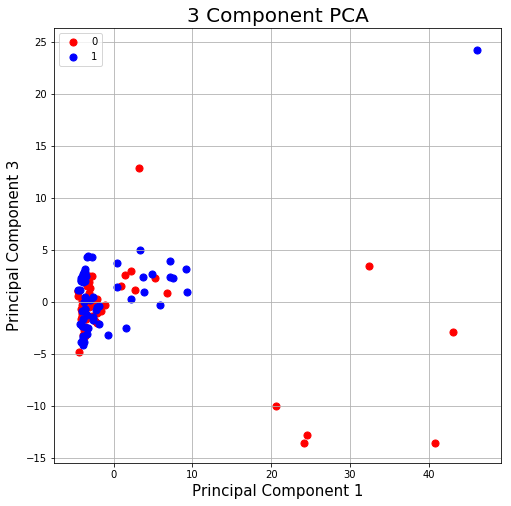

In [222]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'pc 1']
               , pca_df.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
